<a href="https://colab.research.google.com/github/goswamiaman172/Cardiovascular-risk-prediction/blob/main/Individual_colab_cardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter DataScience/Captson3/data/Copy of data_cardiovascular_risk.csv')

In [ ]:
df.shape

(3390, 17)

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**Data Inspecting and Cleaning**

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

It shows that there are no Duplicated Values present in the dataset.

In [ ]:
print((df["glucose"].mode())[0])

75.0


In [ ]:
df["glucose"].fillna((df["glucose"].mode())[0], inplace=True)

Filling the missing spaces of glucosecolumn with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df.shape

(3189, 17)

Dropping all other rows containing missing values

In [ ]:
df.drop(columns='id',inplace=True)

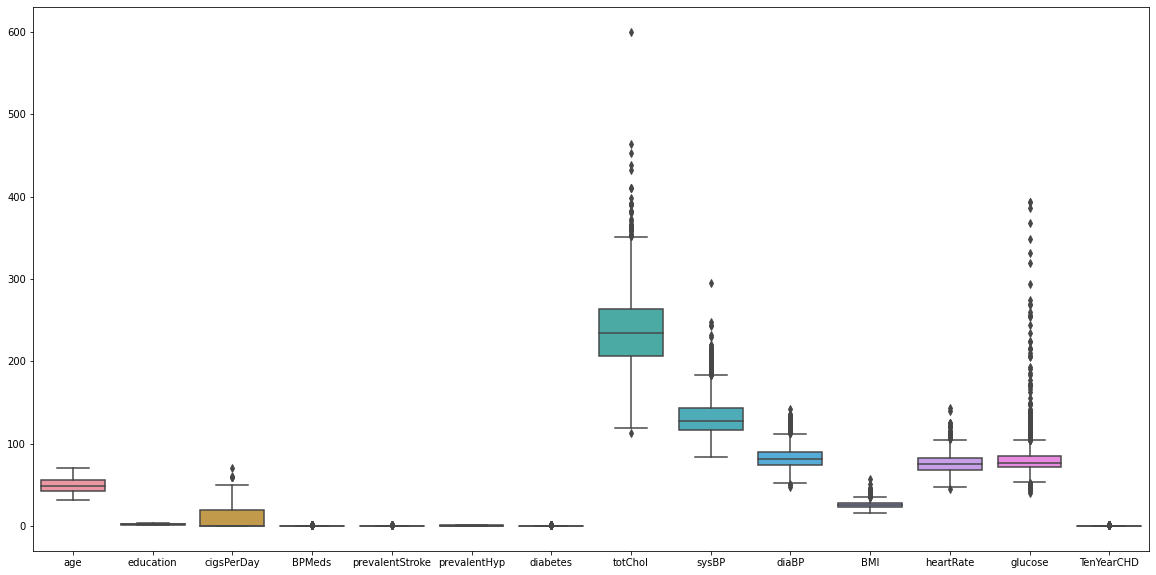

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

In [ ]:
df['totChol'].max()

600.0

The Outlier present in totChol is 600.

In [ ]:
df['sysBP'].max()

295.0

The Outlier present in sysBP is 295.

In [ ]:
df = df[df['totChol']<600.0]
df =df[df['sysBP']<295.0]
df.shape

(3187, 16)

Now with the missing values, outliers and duplicate values dealt with, we proceed to perform EDA

# **Exploratory Data Analysis**

In [ ]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000
mean,49.418575,1.973015,9.103859,0.029495,0.005962,0.312833,0.025102,236.849702,132.376843,82.821305,25.769693,76.028553,81.349859,0.148415
std,8.554900,1.018609,11.866153,0.169215,0.076994,0.463720,0.156459,44.084212,21.990752,11.960124,4.127440,12.057203,23.156614,0.355567
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,22.935000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.360000,75.000000,77.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.500000,27.985000,83.000000,85.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


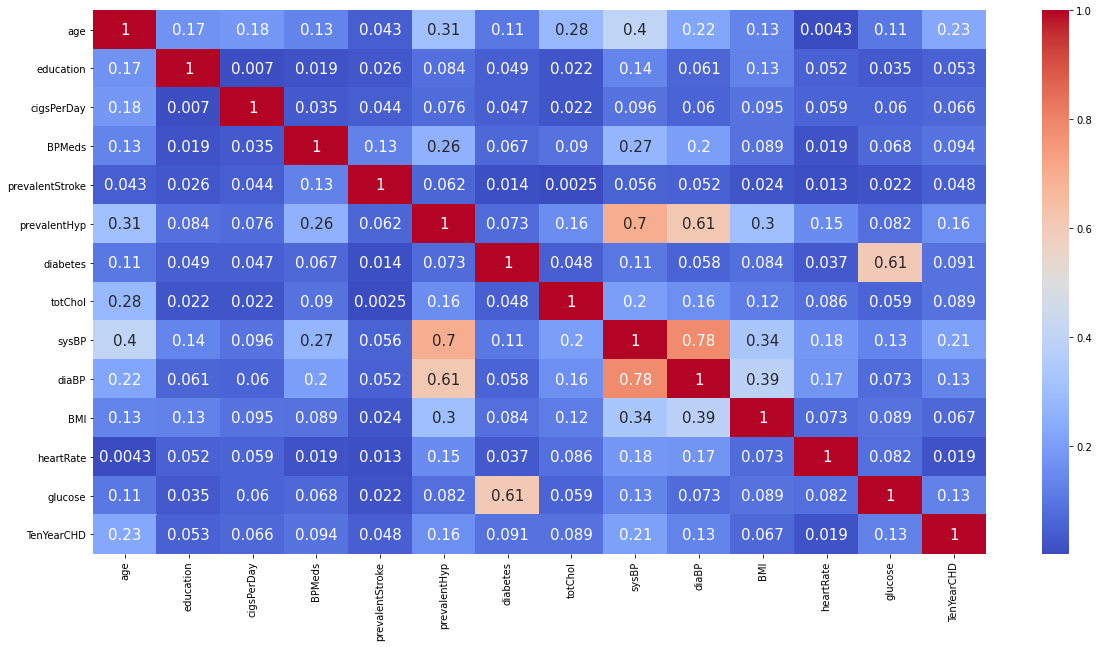

In [ ]:
cormat=df.corr()
top_corr_features=cormat.index
plt.figure(figsize=(20,10))
sns.heatmap(abs(df[top_corr_features].corr()),cmap='coolwarm',annot=True,annot_kws={'size':15})

## **1. Univariate Analysis**

Categorical Features

In [ ]:
categorical_features = ['sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [ ]:
for feature in categorical_features:
    print(feature,':')
    print(df[feature].value_counts())
    print("-----------------")

sex :
F    1794
M    1393
Name: sex, dtype: int64
-----------------
education :
1.0    1337
2.0     959
3.0     531
4.0     360
Name: education, dtype: int64
-----------------
is_smoking :
NO     1608
YES    1579
Name: is_smoking, dtype: int64
-----------------
BPMeds :
0.0    3093
1.0      94
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    3168
1      19
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2190
1     997
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    3107
1      80
Name: diabetes, dtype: int64
-----------------


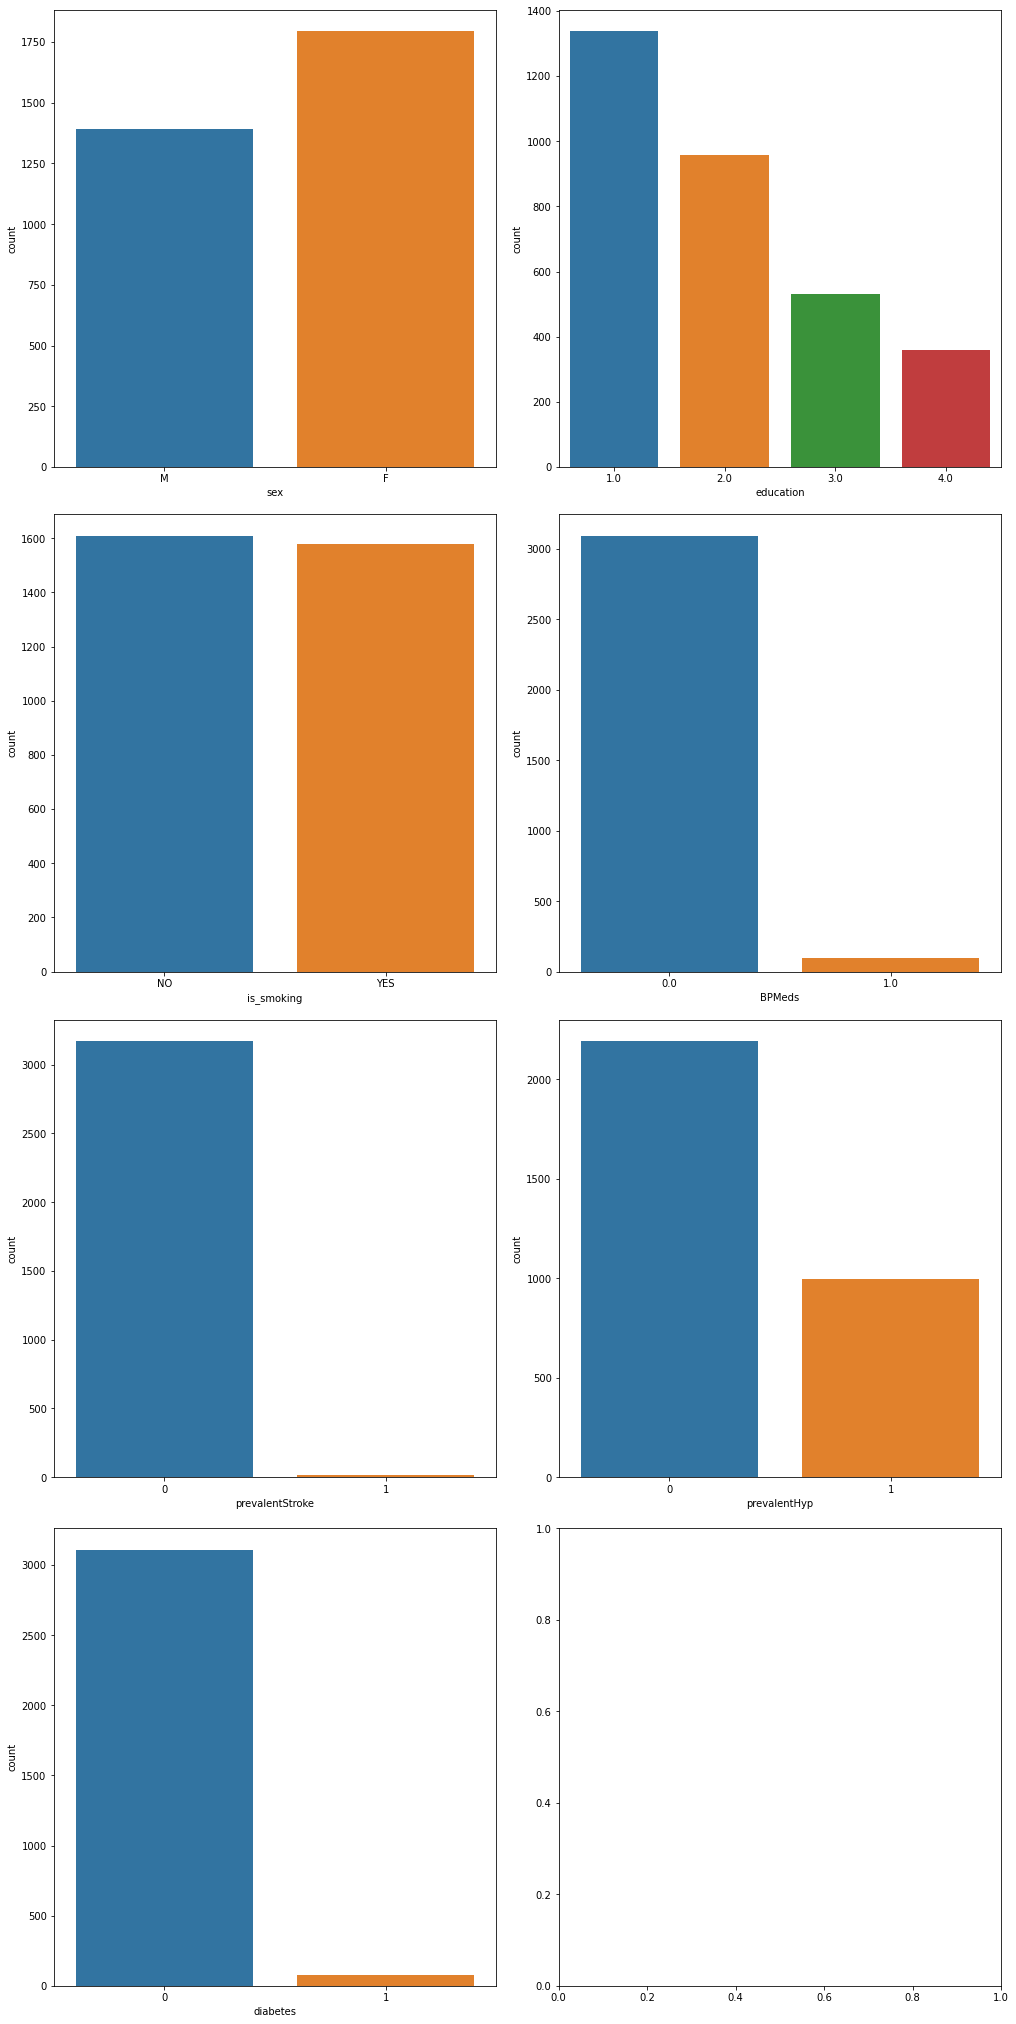

In [ ]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

**Among the categorical features:**

BPmeds, prevalentStroke and diabetes are highly imbalanced.

There are four levels of education whereas the rest categorical features are all binary

The number of Smokers and non-Smokers in currentSmoker is almost the same

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


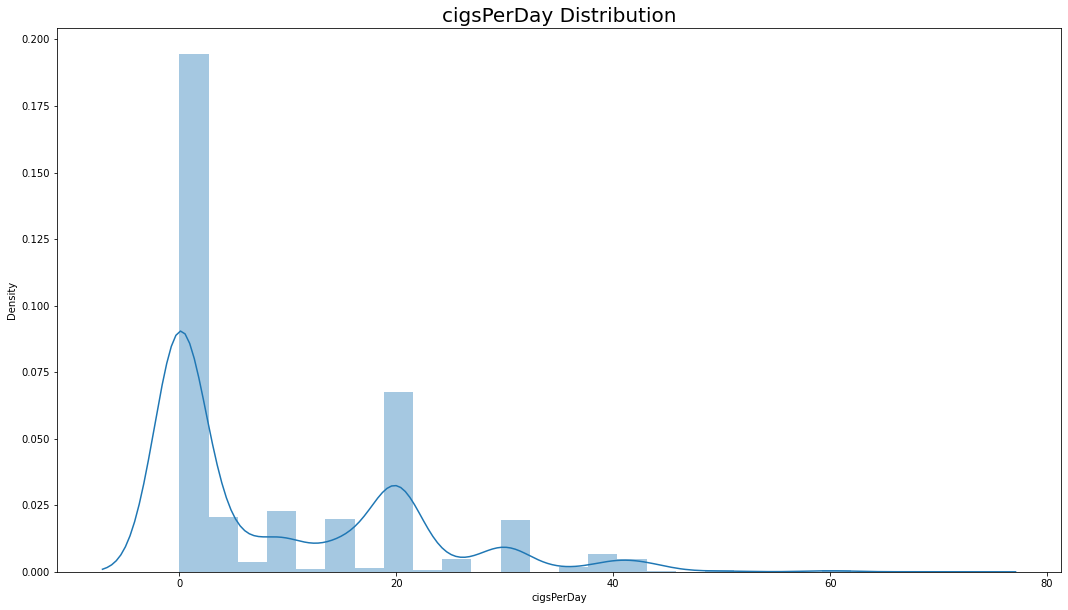

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


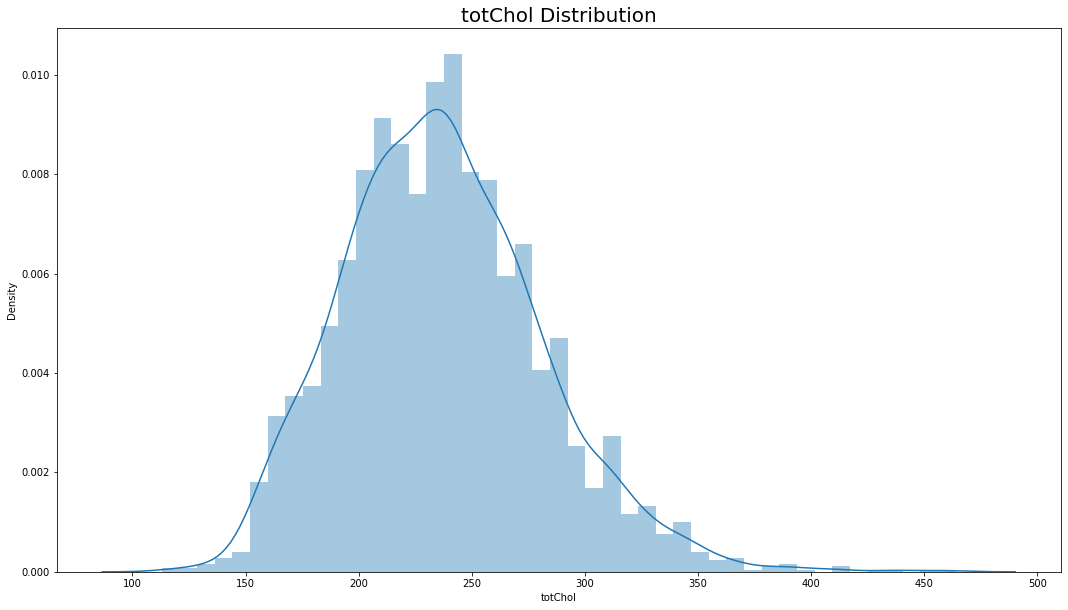

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


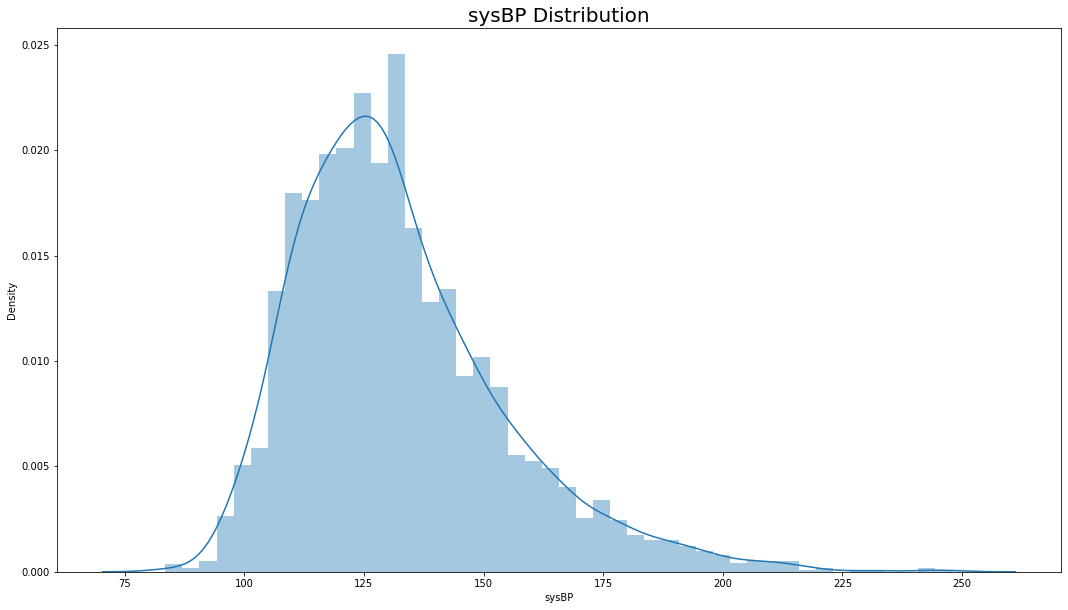

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


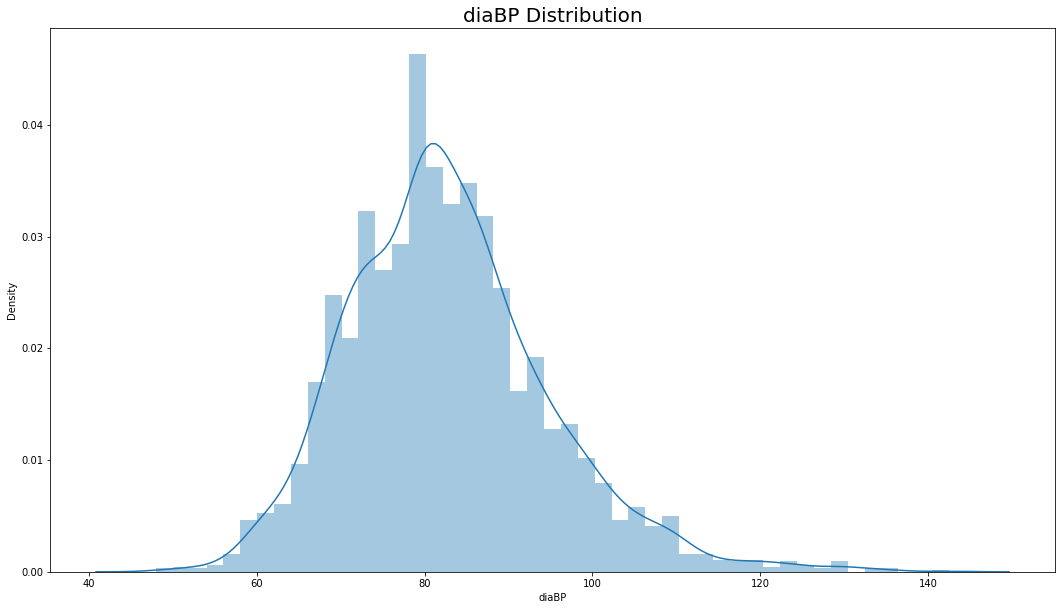

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


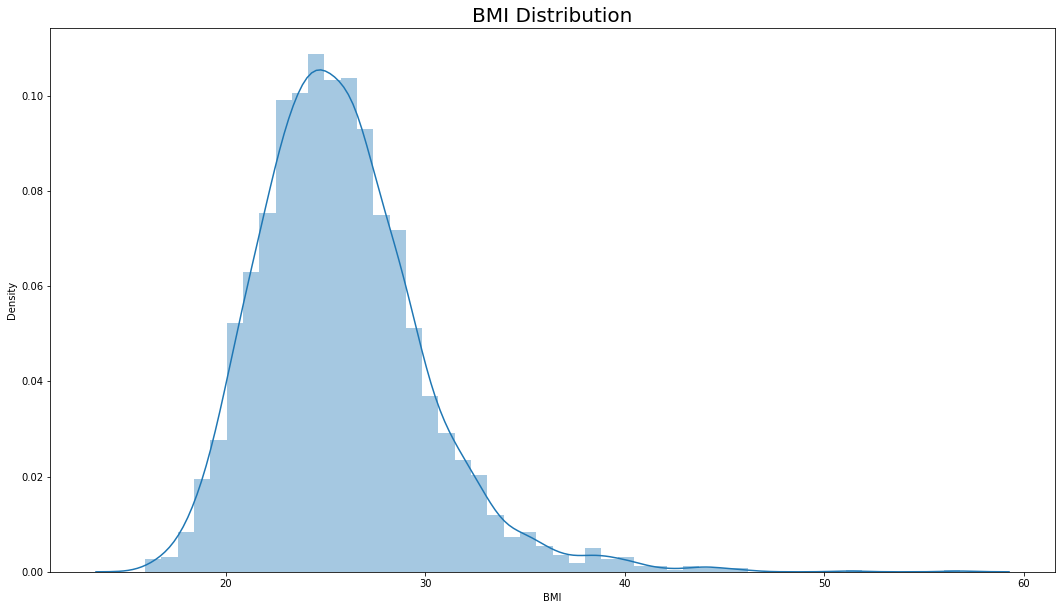

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


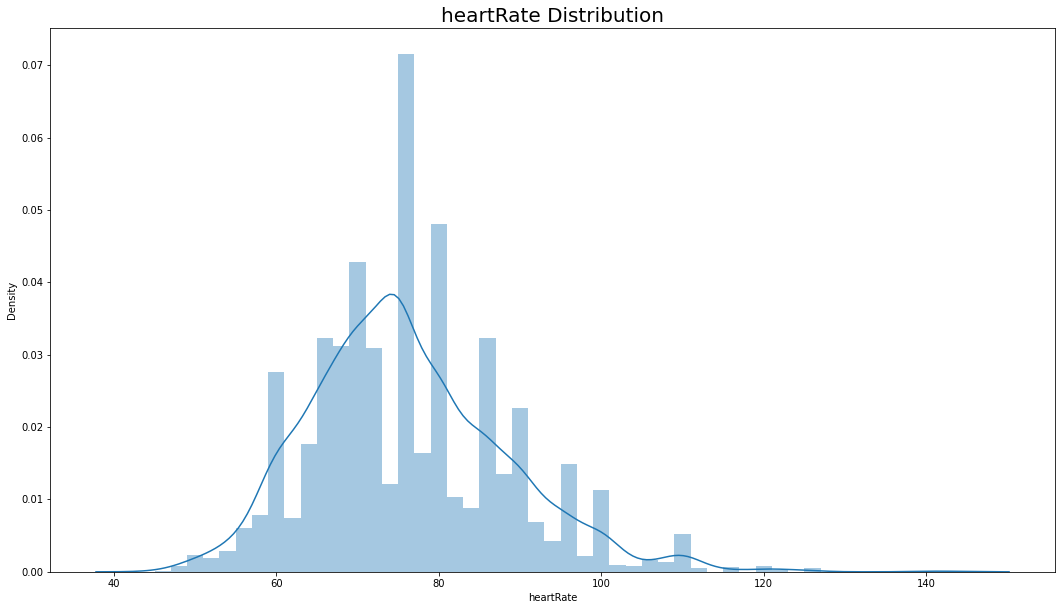

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


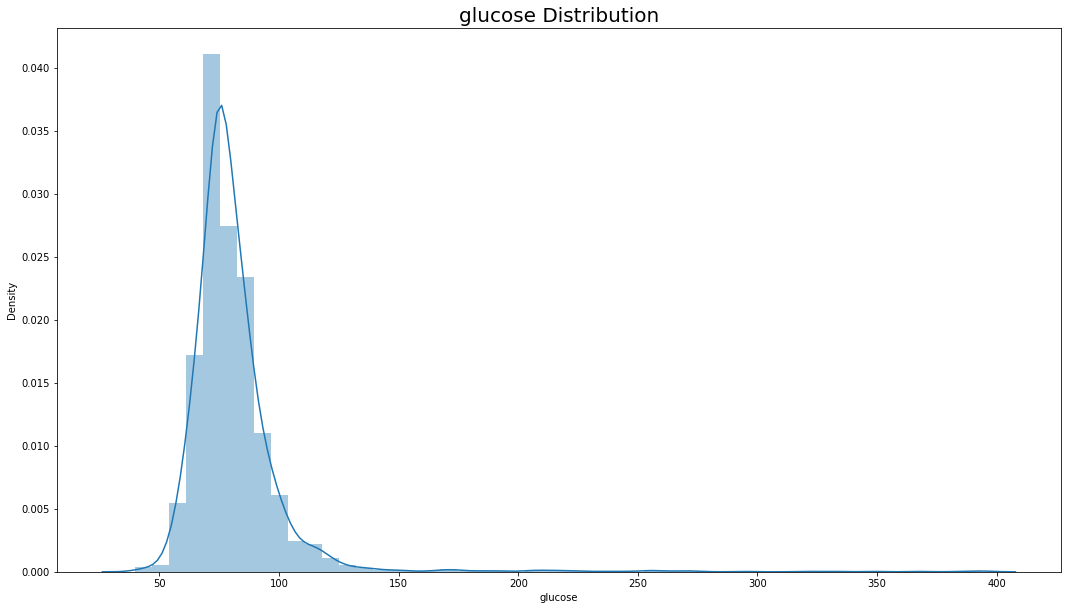

In [ ]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Among the numerical features:

* totChol, sysBP, diaBPand BMI has an uniform distribution and the rest are unevenly distributed

* cigsPerDay has a highly uneven distribution with the most data present in 0

* cigsPerDay and sysBP shows quite a bit and slight right skewness respectively.

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**Target Variable**

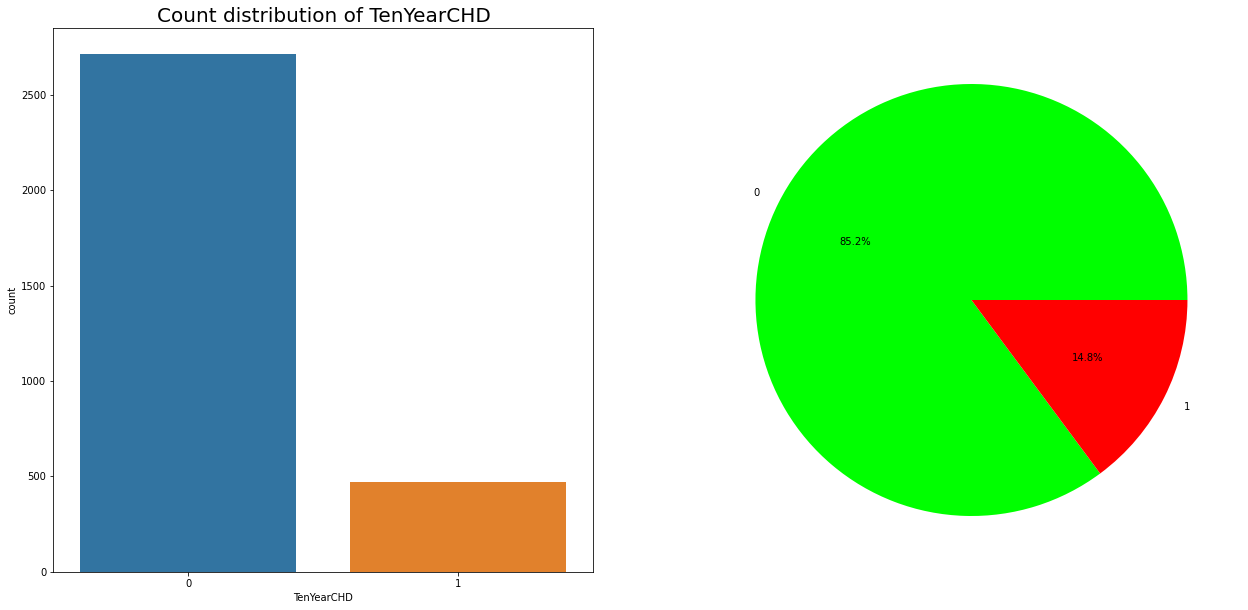

In [ ]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=df)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of.

## **2. Bivariate Analysis**

Relationship between education and cigsPerDay

In [ ]:
#Grouping education and cigsPerDay

graph_1 = df.groupby("education", as_index=False).cigsPerDay.mean()

(array([ 2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 7 Text major ticklabel objects>)

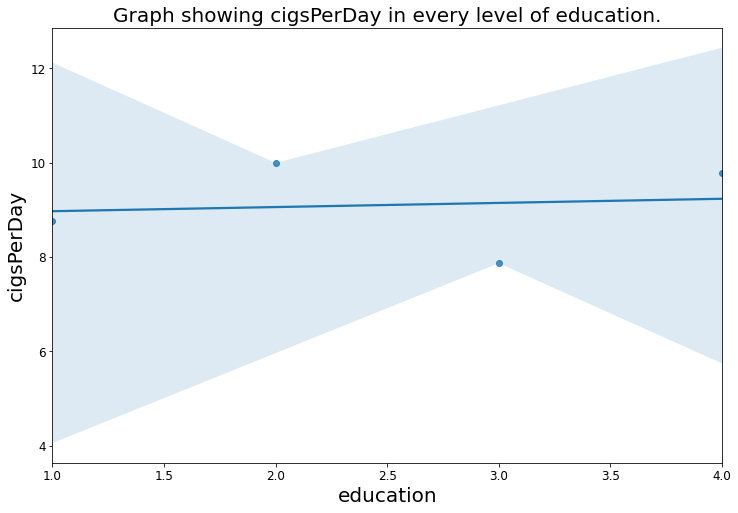

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"])
plt.title("Graph showing cigsPerDay in every level of education.", size=20)
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Which gender has more risk of coronary heart disease CHD

In [ ]:
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = df.groupby("sex", as_index=False).TenYearCHD.sum()

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

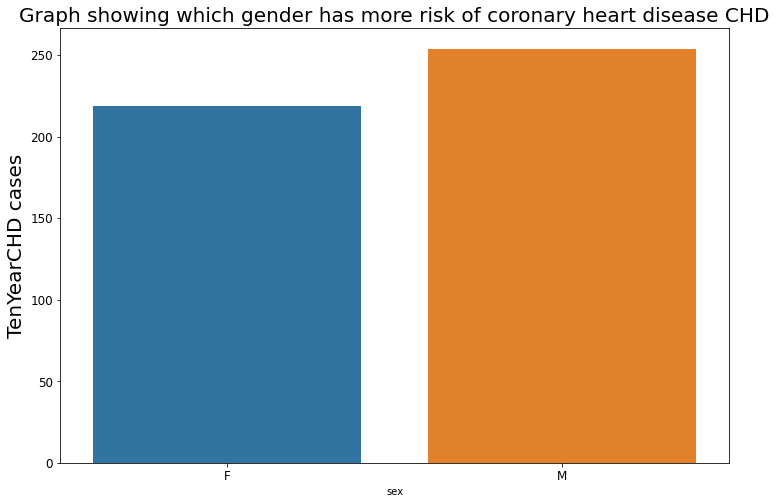

In [ ]:
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["sex"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Which age group has more smokers.

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

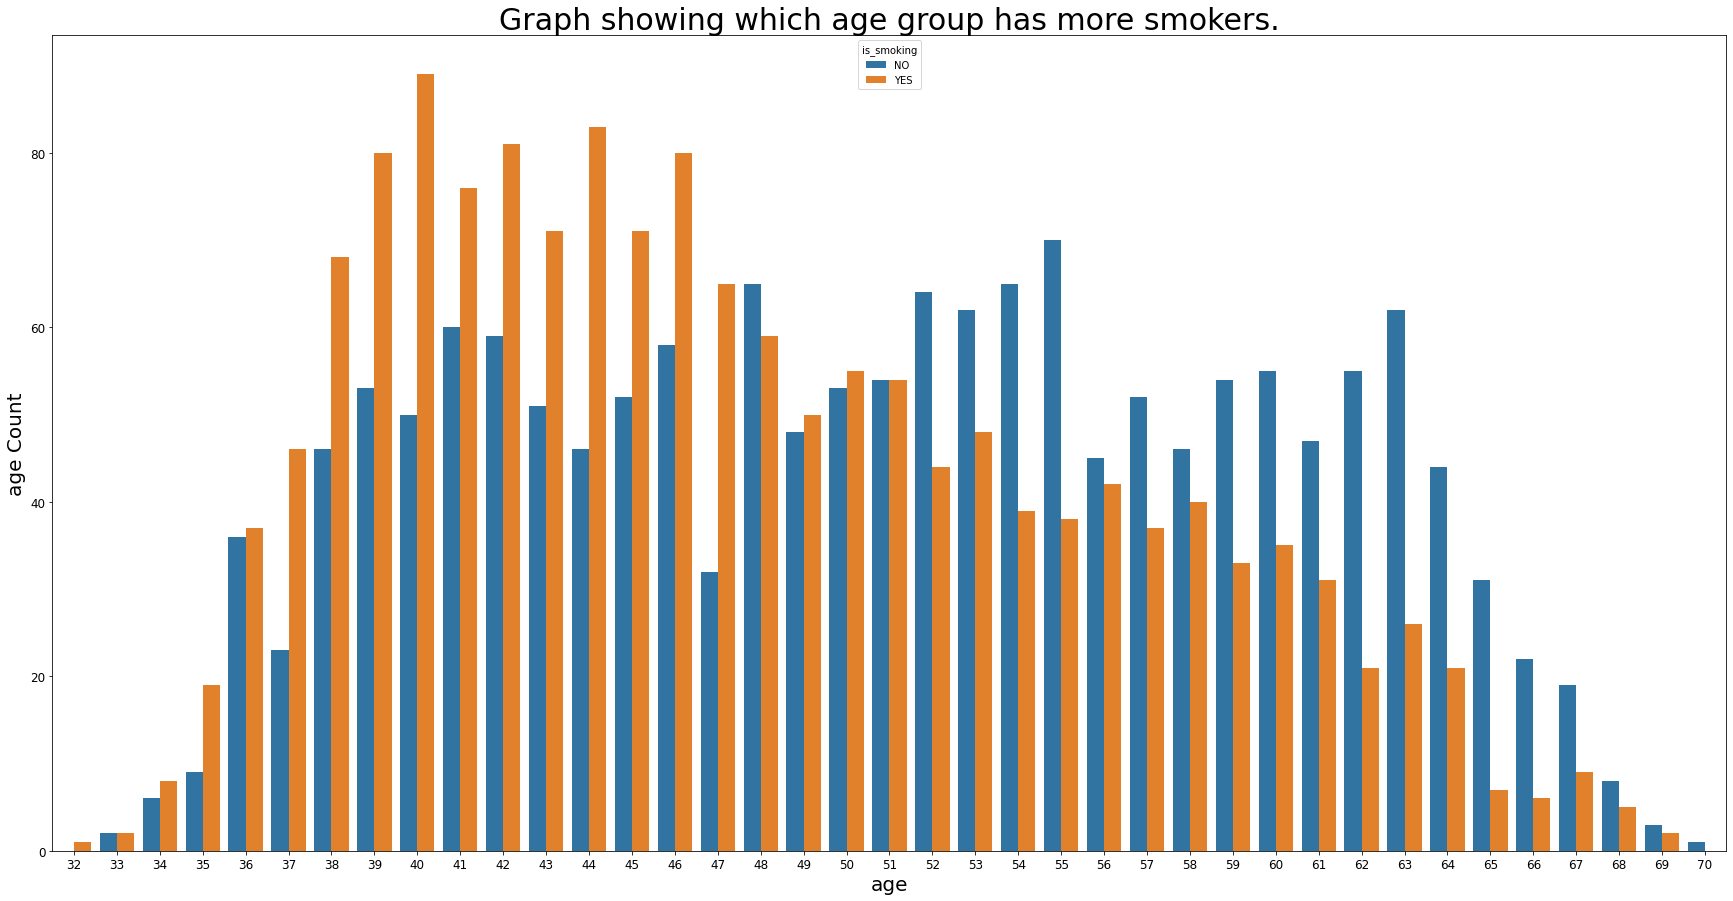

In [ ]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=df,hue="is_smoking")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers

No currentSmokers observed below the age of 32

maximum age for a currentSmokers is 70

**Relation between cigsPerDay and risk of coronary heart disease.**

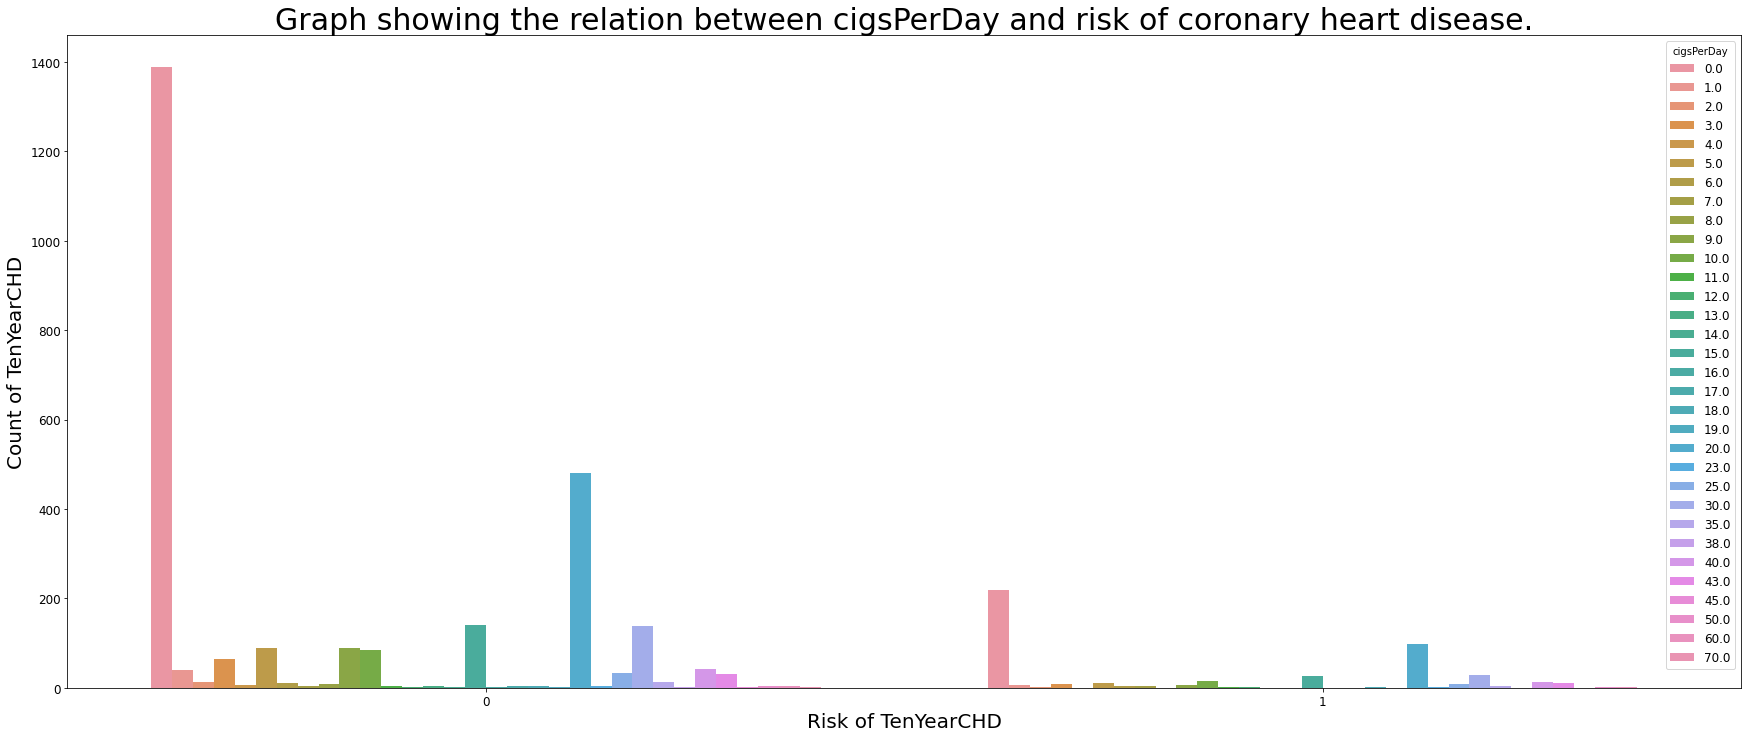

In [ ]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=df,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Low cigsPerDay comes with lower risk of CHD.

Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease

Although that is the case, low cigsPerDay doesn't actually guarantee a much lower risk of CHD

**Relation between sysBP and risk of CHD.**

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

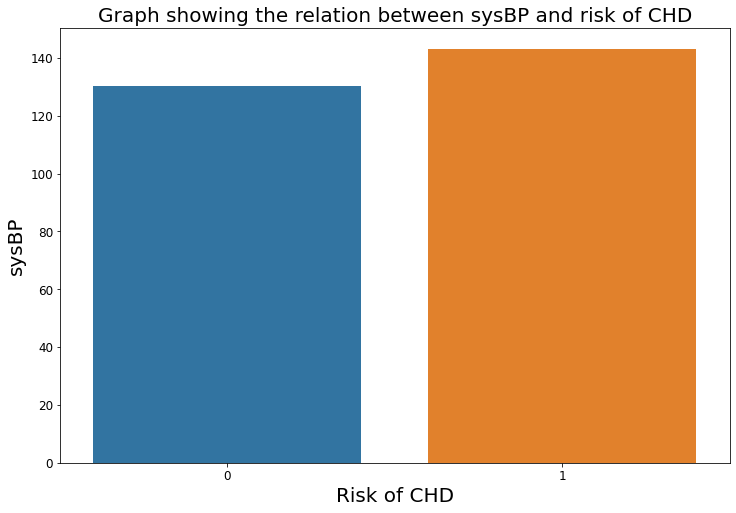

In [ ]:
# Grouping up the data and ploting it

graph_3 = df.groupby("TenYearCHD", as_index=False).sysBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Graph showing the relation between sysBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([ 60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.]),
 <a list of 10 Text major ticklabel objects>)

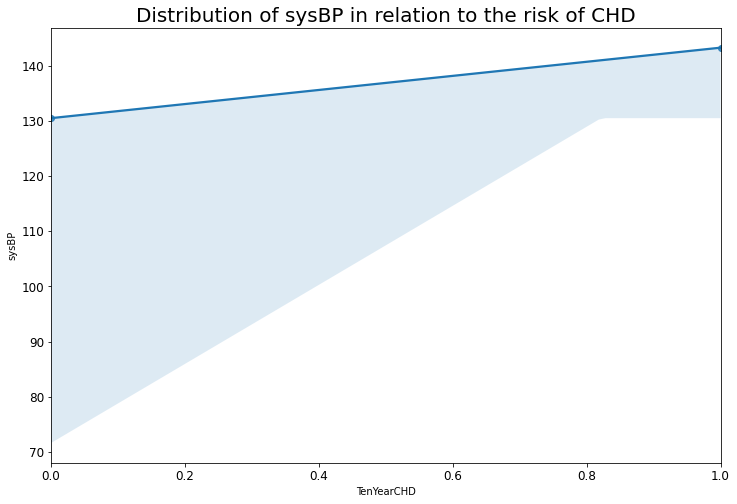

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Minor relation of higher risk of TenYearCHD found with higher sysBP

* Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease

**Relation between diaBP and risk of CHD**

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

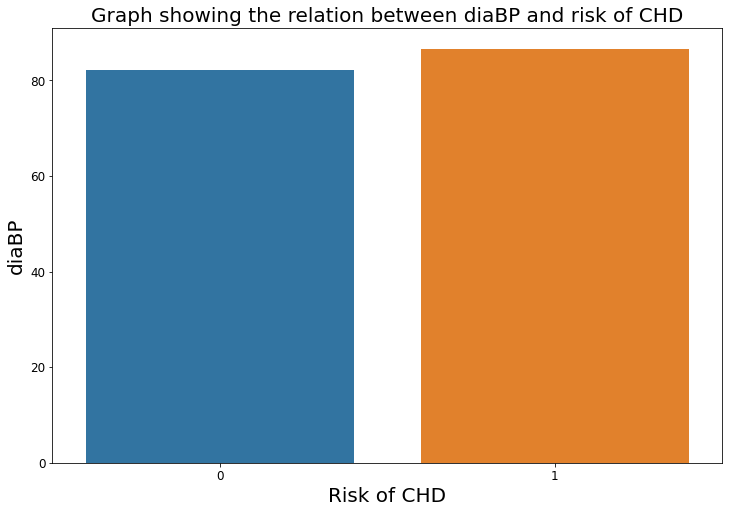

In [ ]:
# Grouping up the data and ploting it

graph_4 = df.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Graph showing the relation between diaBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

**Relation between age and totChol**

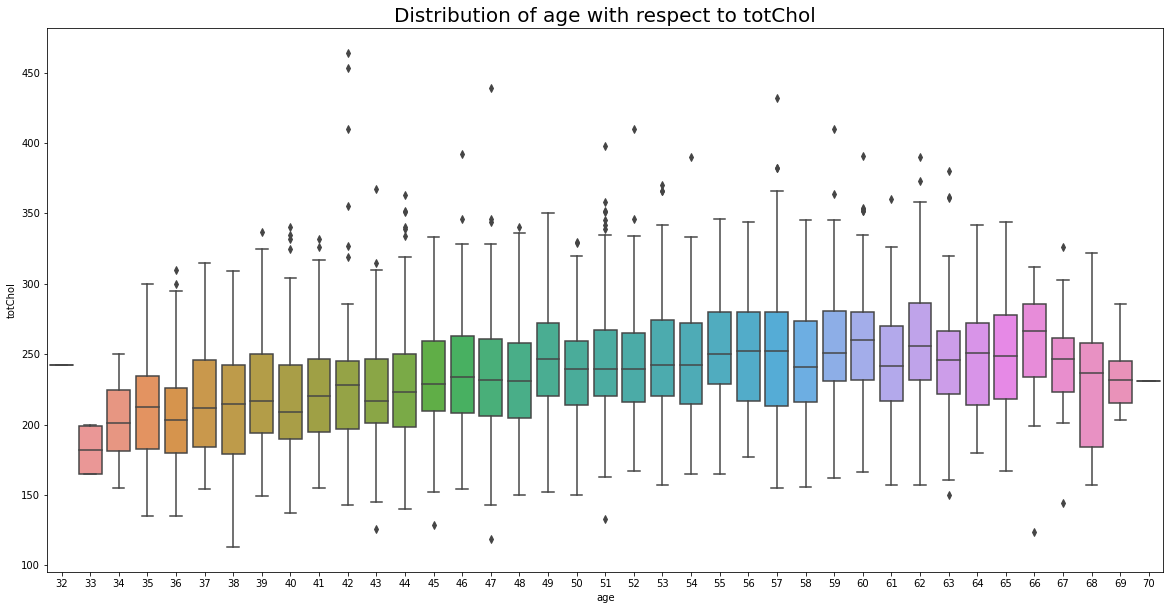

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y="totChol",data=df)
plt.title("Distribution of age with respect to totChol", size=20)
plt.show()

The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

**3. Multivariate Analysis**

Relationship between age and cigsPerDay, totChol, glucose.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

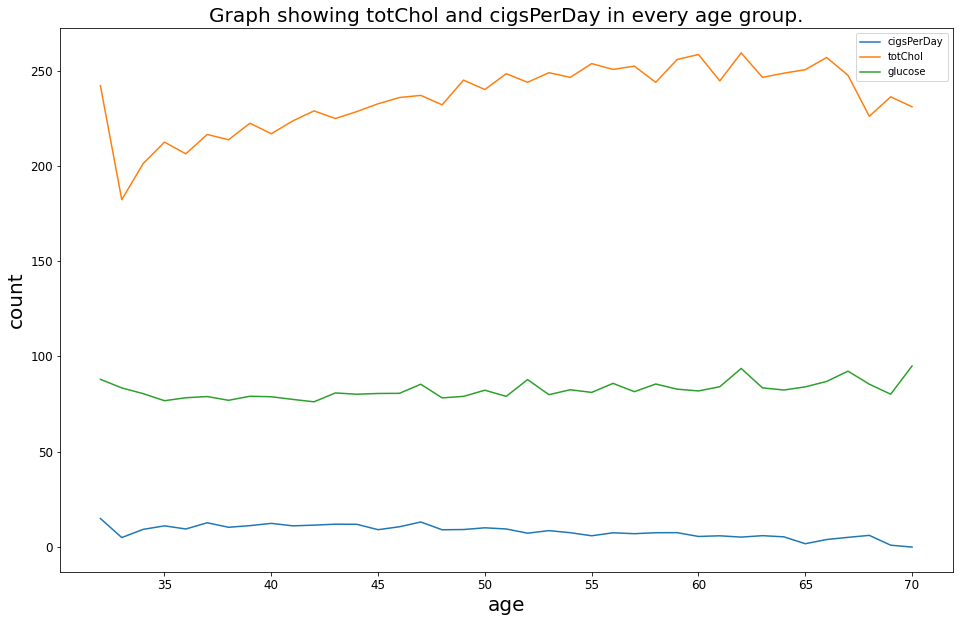

In [ ]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = df.groupby("age").cigsPerDay.mean()
graph_6 = df.groupby("age").totChol.mean()
graph_7 = df.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* There is a minor relation between totChol and glucose.

* totChol has a steep, linear and inverse graph for lower ranges of age

* cigsPerDay has a fairly parallel relationship with age

**Distribution of sysBP vs diaBP with respect to currentSmoker and sex attributes**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


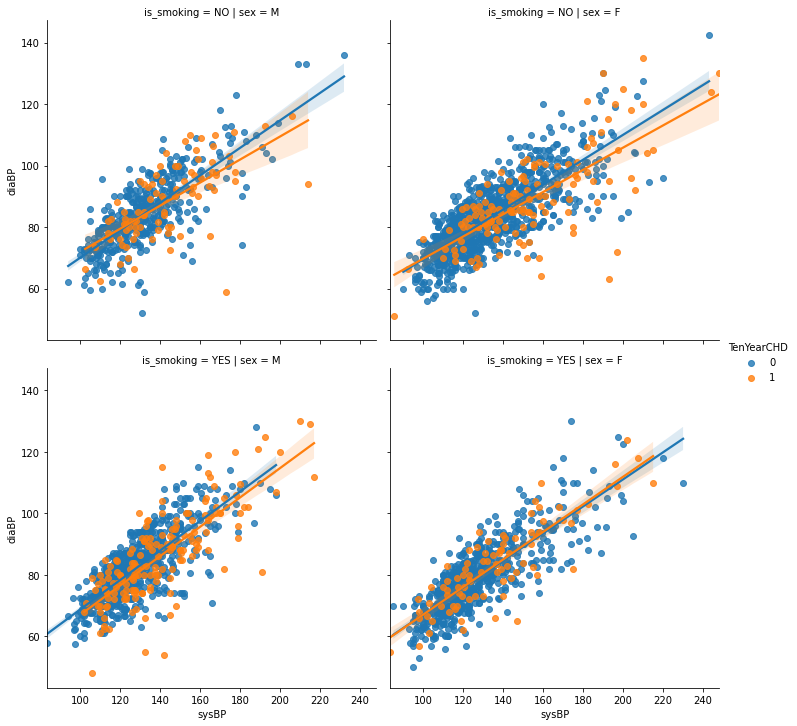

In [ ]:
#sysBP vs diaBP with respect to currentSmoker and male attributes
#plt.figure(figsize=(18, 9), facecolor='w')
sns.lmplot('sysBP', 'diaBP', 
           data=df,
           hue="TenYearCHD",
           col="sex",row="is_smoking")
plt.show()

The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

**Resampling imbalanced dataset by oversampling positive cases**

In [ ]:
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
target1=df[df['TenYearCHD']==1]
target0=df[df['TenYearCHD']==0]

In [ ]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [ ]:
target=pd.concat([target0,target1])

In [ ]:
target['TenYearCHD'].value_counts()

1    2714
0    2714
Name: TenYearCHD, dtype: int64

In [ ]:
df=target
np.shape(df)

(5428, 16)

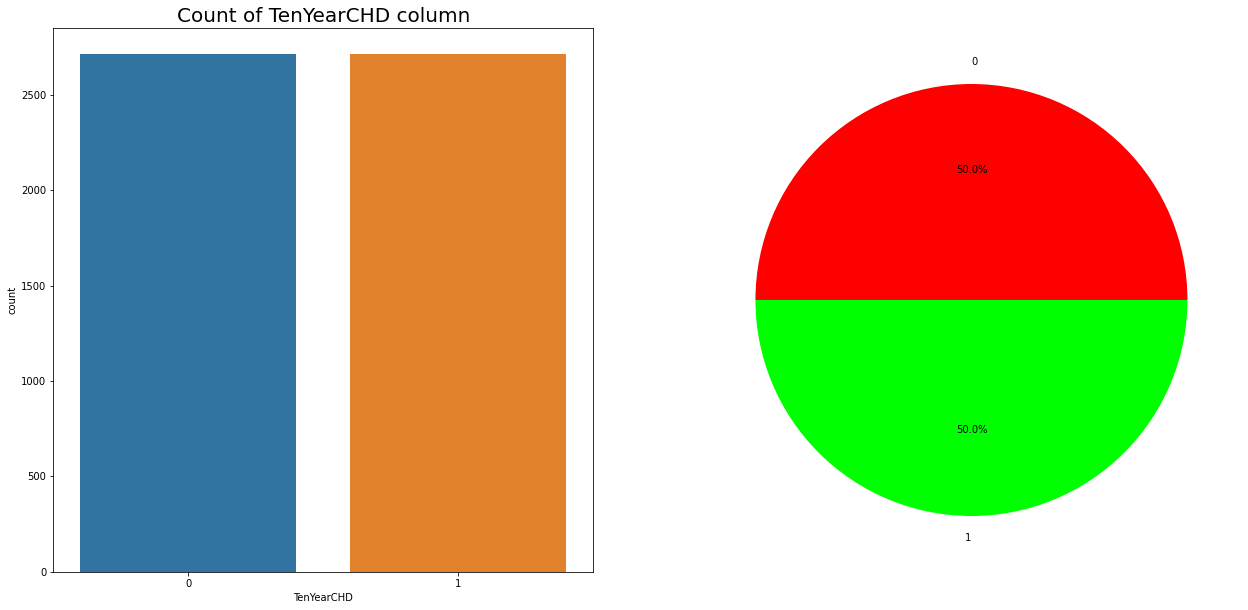

In [ ]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

he number of positive and negative cases are equal. Hence the classes are now balanced for model fitting

## **Feature Selection**

In [ ]:
df.shape

(5428, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5428 entries, 1 to 438
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              5428 non-null   int64  
 1   education        5428 non-null   float64
 2   sex              5428 non-null   float64
 3   is_smoking       5428 non-null   object 
 4   cigsPerDay       5428 non-null   float64
 5   BPMeds           5428 non-null   float64
 6   prevalentStroke  5428 non-null   int64  
 7   prevalentHyp     5428 non-null   int64  
 8   diabetes         5428 non-null   int64  
 9   totChol          5428 non-null   float64
 10  sysBP            5428 non-null   float64
 11  diaBP            5428 non-null   float64
 12  BMI              5428 non-null   float64
 13  heartRate        5428 non-null   float64
 14  glucose          5428 non-null   float64
 15  TenYearCHD       5428 non-null   int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 880.9+ KB


In [ ]:
encoders_nums = {"sex":{"M":1,"F":0},
                 "is_smoking":{"YES":1,"NO":0}}

df = df.replace(encoders_nums)

In [ ]:
df['is_smoking'].value_counts()

YES    2784
NO     2644
Name: is_smoking, dtype: int64

In [ ]:
df['sex'].value_counts()

F    2825
M    2603
Name: sex, dtype: int64

In [ ]:
df['sex'] = df['sex'].astype(float)

In [ ]:
df['is_smoking'] = df['is_smoking'].astype(float)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1.0,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0.0,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
4,64,1.0,0.0,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
6,61,1.0,1.0,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,36,4.0,1.0,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0


In [ ]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X_df=df.iloc[:,0:15]
y_df=df.iloc[:,-1]
print("X - ", X_df.shape, "\ny - ", y_df.shape)

X -  (5428, 15) 
y -  (5428,)


In [ ]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [ ]:
fit=best.fit(X_df,y_df)

In [ ]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X_df.columns)

In [ ]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature        Score
10         sysBP  1394.025389
14       glucose  1312.313492
0            age   758.618072
9        totChol   744.183944
4     cigsPerDay   664.892545
11         diaBP   275.324476
7   prevalentHyp   152.053537
8       diabetes    73.830508
5         BPMeds    47.438596
2            sex    40.578179
12           BMI    35.375923


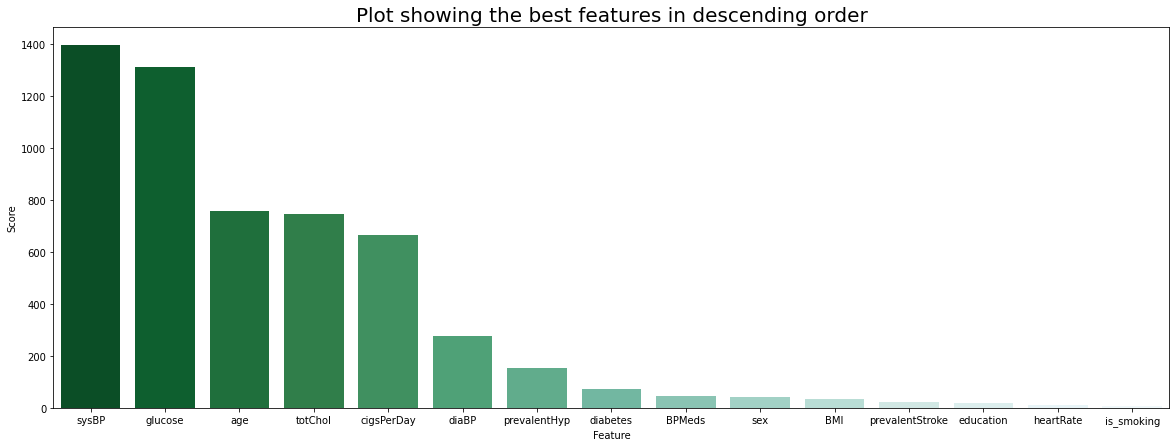

In [ ]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

In [ ]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'sex']

In [ ]:
df=df[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','sex','BPMeds','diabetes','TenYearCHD']]
df.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,sex,BPMeds,diabetes,TenYearCHD
1,168.0,75.0,36,0.0,212.0,98.0,1,1.0,0.0,0,0
2,116.0,94.0,46,10.0,250.0,71.0,0,0.0,0.0,0,0
4,136.5,77.0,64,30.0,241.0,85.0,0,0.0,0.0,0,0
6,232.0,79.0,61,0.0,238.0,136.0,1,1.0,0.0,0,0
7,102.0,63.0,36,35.0,295.0,68.0,0,1.0,0.0,0,0


**Feature Splitting and Scaling**

In [ ]:
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
from mlxtend.classifier import StackingCVClassifier

In [ ]:
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

We divide the dataset into training and test sub-datasets for predictive modeling

In [ ]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

**Predictive Modeling**

We use the following different machine learning models for the dataset:

* Logistic Regressor

* K-Nearest Neighbour Classifier

* Random Forest Classifier

* Decision Tree Classifier

* Gradient Boosting Classifier

In [ ]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[722 385]
 [360 705]]


Accuracy of Logistic Regression: 65.69981583793738 

              precision    recall  f1-score   support

           0       0.67      0.65      0.66      1107
           1       0.65      0.66      0.65      1065

    accuracy                           0.66      2172
   macro avg       0.66      0.66      0.66      2172
weighted avg       0.66      0.66      0.66      2172



In [ ]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[ 921  186]
 [  14 1051]]


Accuracy of k-NN Classification: 90.79189686924494 

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1107
           1       0.85      0.99      0.91      1065

    accuracy                           0.91      2172
   macro avg       0.92      0.91      0.91      2172
weighted avg       0.92      0.91      0.91      2172



In [ ]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[ 891  216]
 [  11 1054]]


Accuracy of DecisionTreeClassifier: 89.548802946593 

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1107
           1       0.83      0.99      0.90      1065

    accuracy                           0.90      2172
   macro avg       0.91      0.90      0.89      2172
weighted avg       0.91      0.90      0.89      2172



In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[ 949  158]
 [  40 1025]]


Accuracy of Random Forest: 90.88397790055248 

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1107
           1       0.87      0.96      0.91      1065

    accuracy                           0.91      2172
   macro avg       0.91      0.91      0.91      2172
weighted avg       0.91      0.91      0.91      2172



In [ ]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confussion matrix
[[773 334]
 [236 829]]


Accuracy of Gradient Boosting Classifier: 73.75690607734806 

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1107
           1       0.71      0.78      0.74      1065

    accuracy                           0.74      2172
   macro avg       0.74      0.74      0.74      2172
weighted avg       0.74      0.74      0.74      2172



**Hyperparameter Tuning for best Classifier**

Using Randomized Search Cross Validation

## **Random Forest Classifier**

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
best_param=rf_random.best_params_

In [ ]:
best_param

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1800}

In [ ]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(rf_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(test_x, test_y)))
rf_predicted = rf_hyper.predict(test_x)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(test_y, rf_predicted))

Accuracy on training set is : 1.0
Accuracy on validation set is : 0.9613259668508287
Accuracy of Hyper-tuned Random Forest Classifier: 96.13259668508287 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1107
           1       0.94      0.98      0.96      1065

    accuracy                           0.96      2172
   macro avg       0.96      0.96      0.96      2172
weighted avg       0.96      0.96      0.96      2172



In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')